In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("F:/Study/Wscube-tech/Machine-learning/Datasets/Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


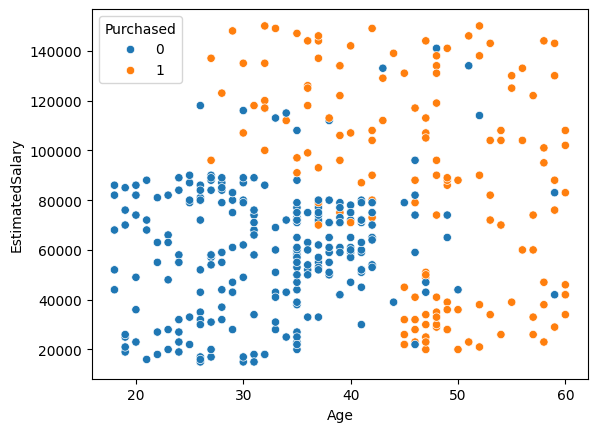

In [16]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()
# this graph is non linear splitting graph 

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [5]:
# Applying scaling on our data 
from sklearn.preprocessing import StandardScaler

In [6]:
se = StandardScaler()

In [7]:
se.fit(x)
x = pd.DataFrame(se.transform(x),columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

### pre pruning 

In [33]:
dt = DecisionTreeClassifier(max_depth=5)
# applying pre pruning using max_depth function 

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
#dt.score(x_test,y_test)*100    # Before pruning  testing accuracy  83.75

In [36]:
dt.score(x_test,y_test)*100 

90.0

In [37]:
#dt.score(x_train,y_train)*100     # before pruning traing accuracy 99.6875


In [38]:
dt.score(x_train,y_train)*100


93.4375

#### Training accuracy (99.6875) is higher then testing accuracy (83.75) its our model is overfitting ^^^ 

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


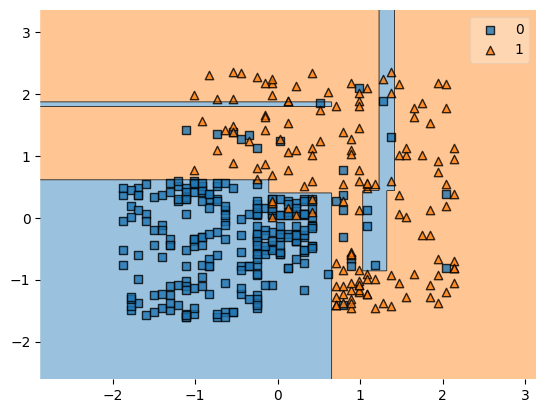

In [39]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()
# 

#### According to this data set we cannot use linear  algorithm . we use decision tree or any other non linear algorithm ^^^  

In [40]:
from sklearn.tree import plot_tree

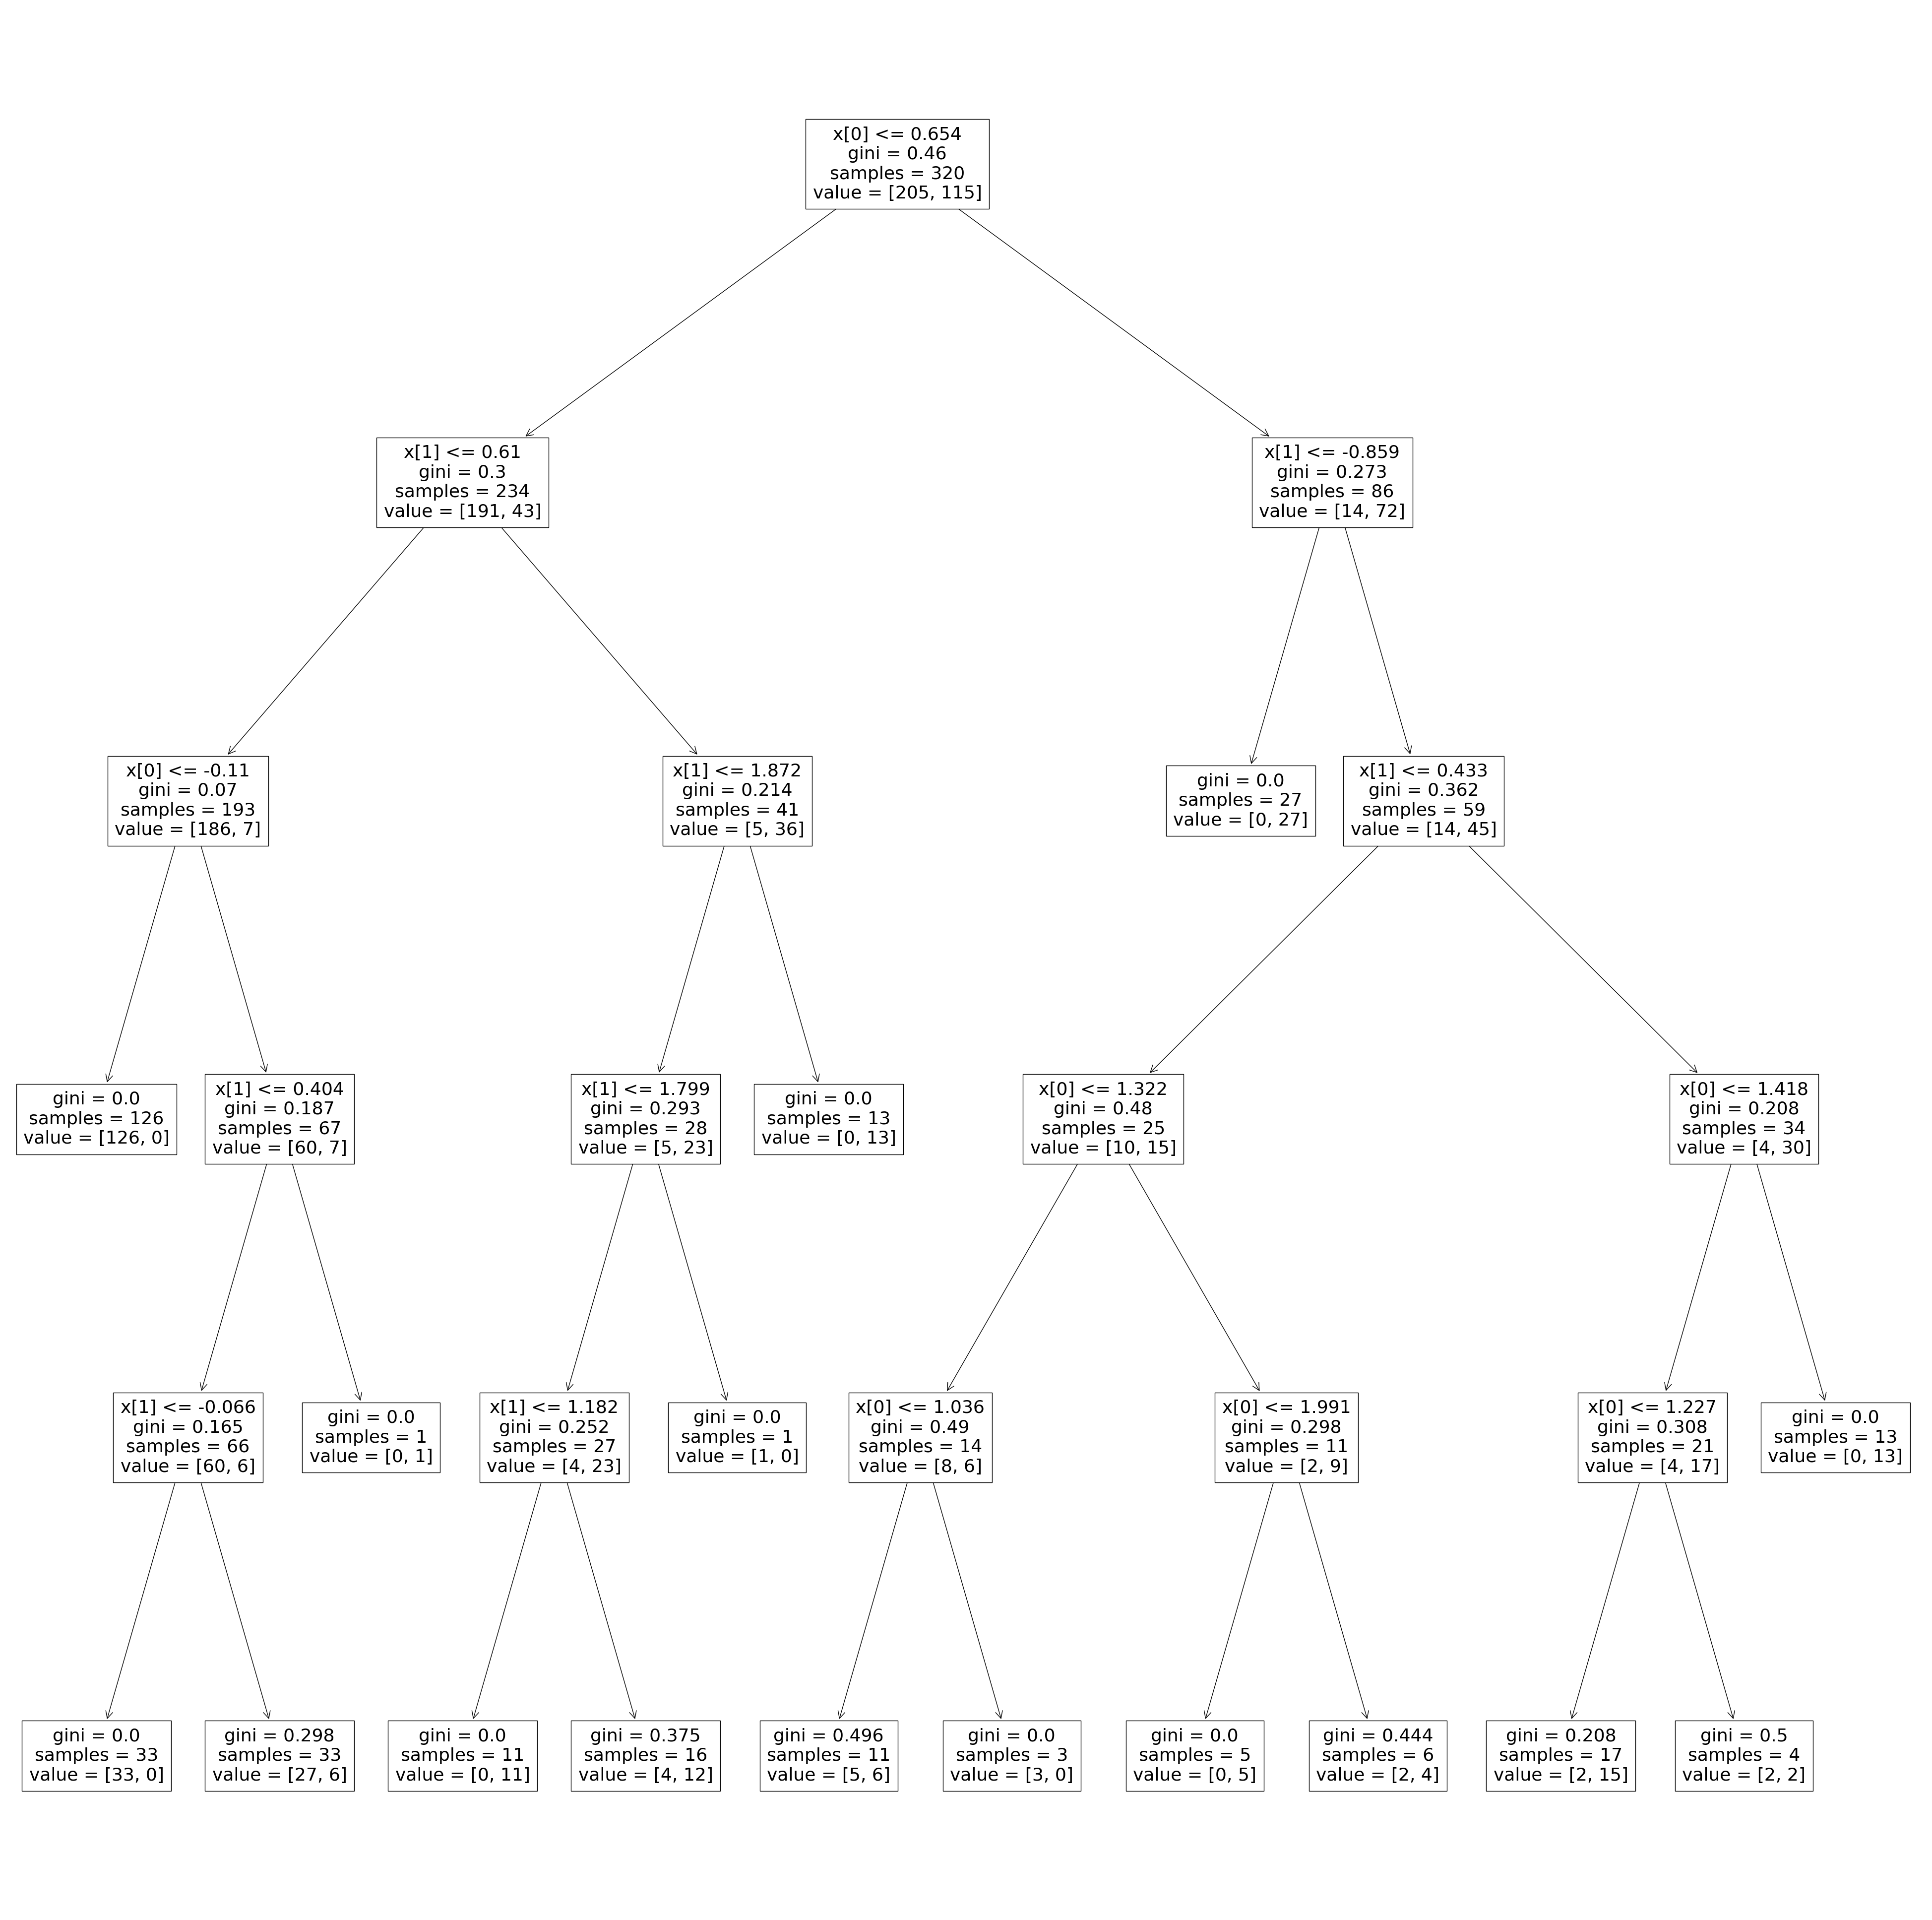

In [41]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("Demo.jpg")
plt.show()

### post pruning 

In [42]:
for i in range(1,20 ):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)
    # in case of 2 and 3 there is a less difference 

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [43]:
dt = DecisionTreeClassifier(max_depth=3)
# applying post pruning using max_depth function 

dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
dt.score(x_test,y_test)*100     # testing accuracy 

91.25

In [45]:
dt.score(x_train,y_train)*100   # traing accuracy 


91.875

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


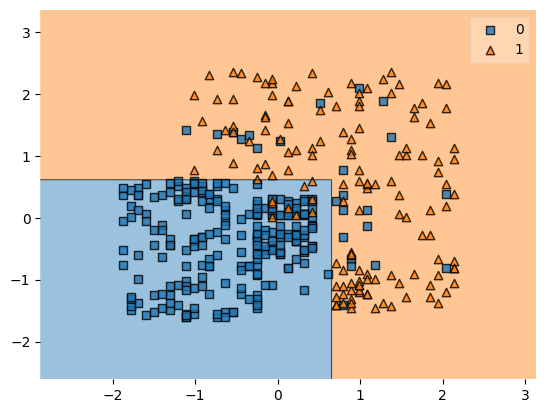

In [46]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()
# 

In [47]:
from sklearn.tree import plot_tree

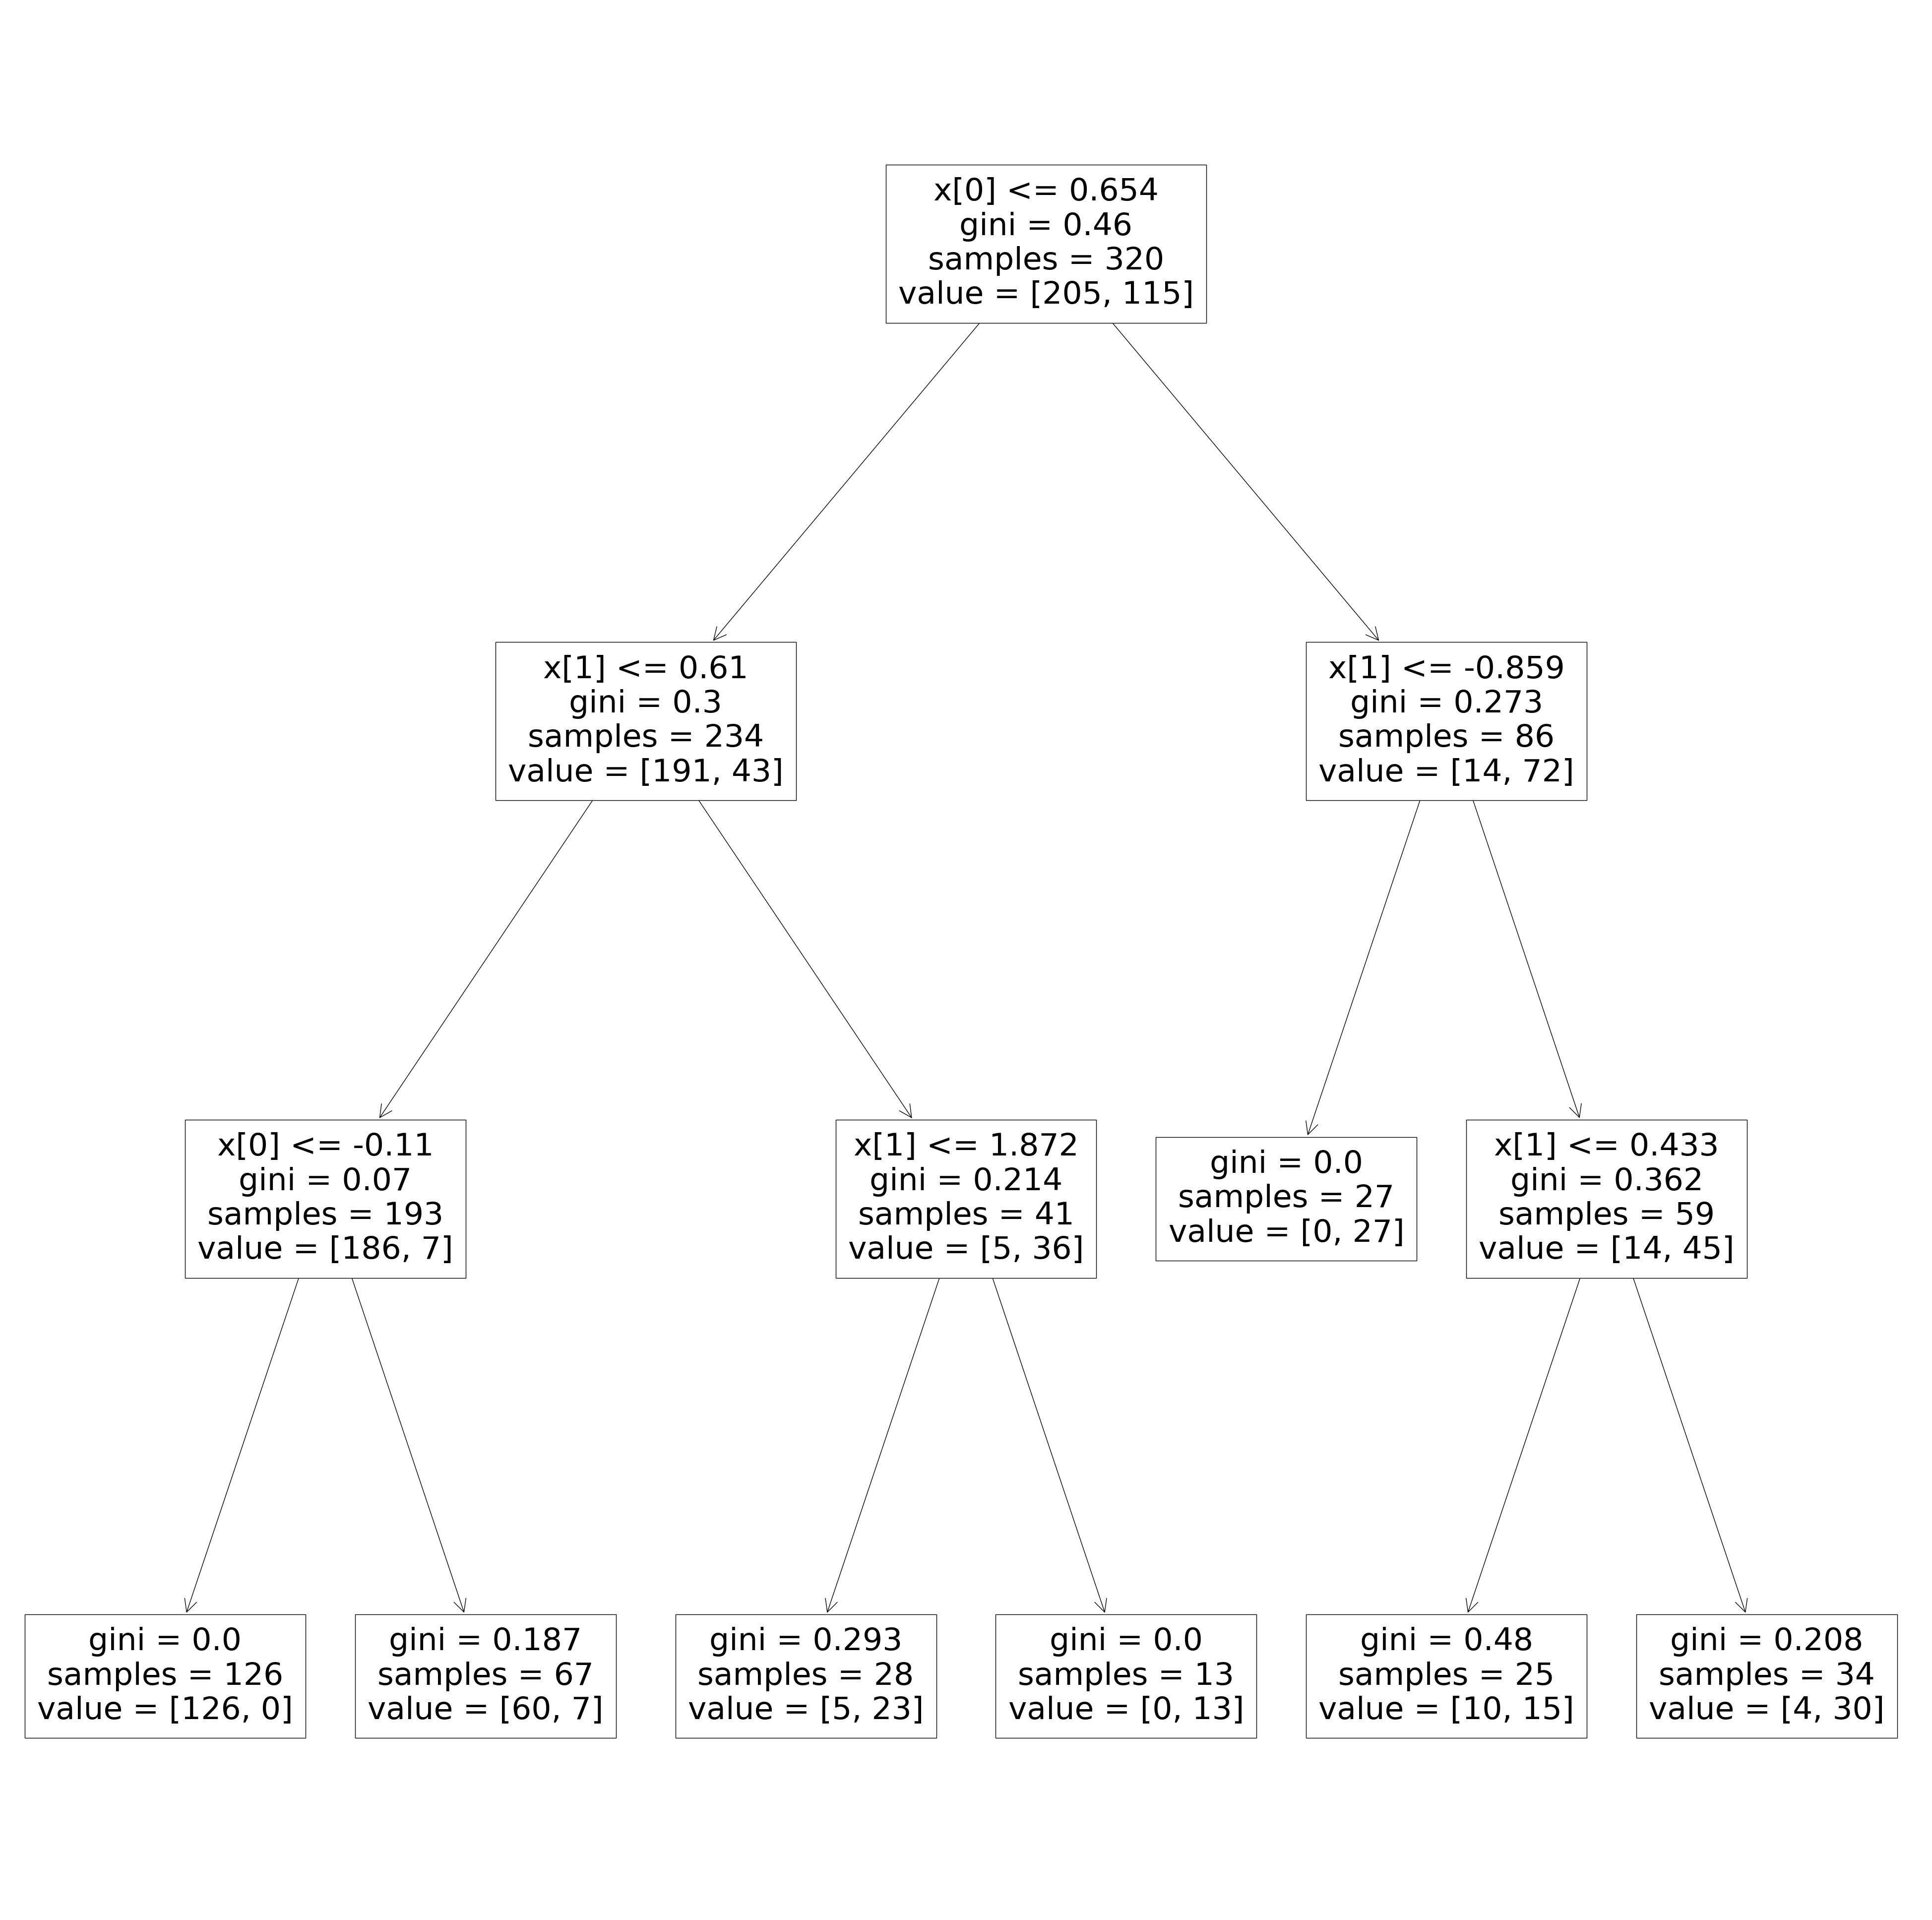

In [48]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("Demo.jpg")
plt.show()